In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/raw/chips.csv').sample(frac=1)
target = 'class'
features = df.drop(columns=[target])
labels = df[target]
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, shuffle=False)

blue_class = df[df[target] == 1]
red_class = df[df[target] == 0]

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.inspection import DecisionBoundaryDisplay


def test_model(model, n_splits: int = 5, n_tests: int = 7):
    k_fold = KFold(n_splits=n_splits, shuffle=False)
    total_train_score = 0
    total_test_score = 0
    for i in range(n_tests):
        for train, test in k_fold.split(features, labels):
            model.fit(features.loc[train], labels.loc[train])
            total_train_score += model.score(features.loc[train], labels.loc[train])
            total_test_score += model.score(features.loc[test], labels.loc[test])
    return total_train_score / n_splits / n_tests, total_test_score / n_splits / n_tests


def draw_plot(model):
    model.fit(train_x, train_y)
    DecisionBoundaryDisplay.from_estimator(
        model, train_x, response_method="predict", cmap=plt.cm.RdBu,
    )
    plt.scatter(x=red_class.x, y=red_class.y, c='red')
    plt.scatter(x=blue_class.x, y=blue_class.y, c='blue')
    plt.show()
    print(f'Score: {model.score(test_x, test_y)}')

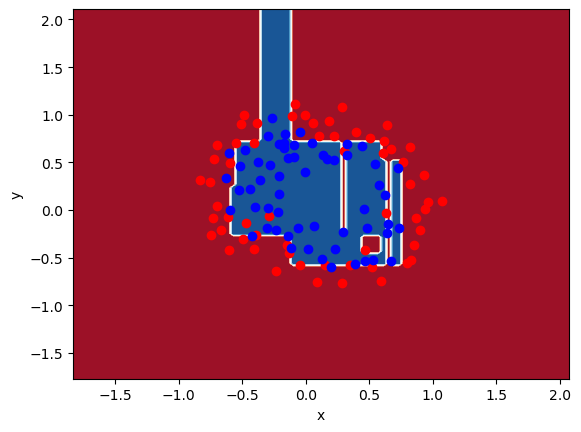

Score: 0.6666666666666666


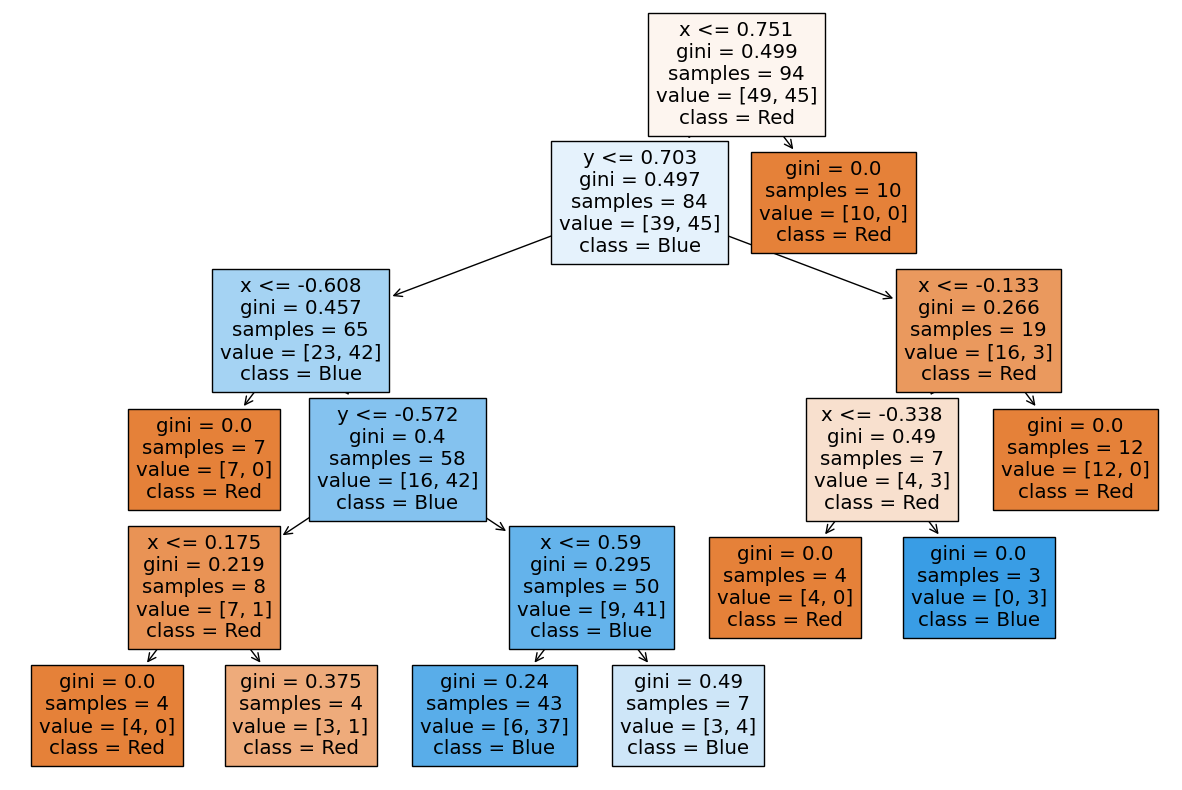

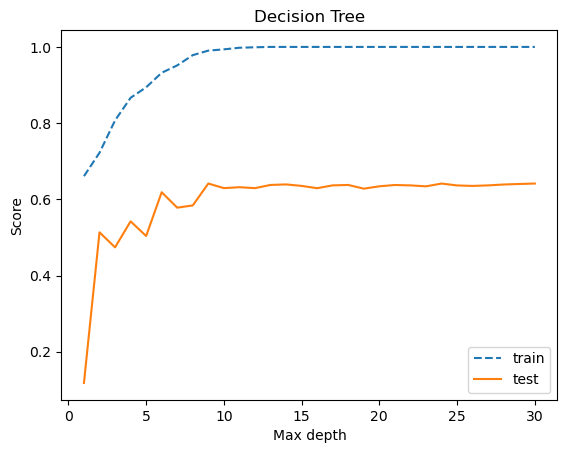

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

draw_plot(DecisionTreeClassifier())

model = DecisionTreeClassifier(max_depth=5)
model.fit(train_x, train_y)
fig = plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features.columns, class_names=['Red', 'Blue'], filled=True)
plt.show()

max_depths = list(range(1, 31))
scores = [test_model(DecisionTreeClassifier(max_depth=max_depth)) for max_depth in max_depths]
train_scores = [train_score for train_score, _ in scores]
test_scores = [test_score for _, test_score in scores]
plt.plot(max_depths, train_scores, label='train', linestyle='--')
plt.plot(max_depths, test_scores, label='test')
plt.legend(loc='lower right')
plt.title("Decision Tree")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.show()

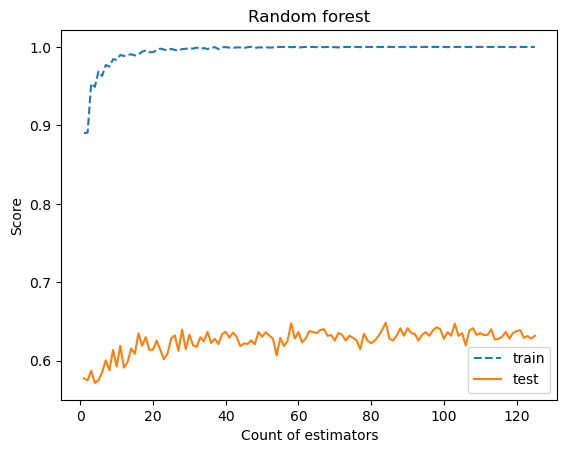

In [4]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = list(range(1, 126))
scores = [test_model(RandomForestClassifier(n_estimators=n_estimators)) for n_estimators in n_estimators_list]
train_scores = [train_score for train_score, _ in scores]
test_scores = [test_score for _, test_score in scores]
plt.plot(n_estimators_list, train_scores, label='train', linestyle='--')
plt.plot(n_estimators_list, test_scores, label='test')
plt.legend(loc='lower right')
plt.title("Random forest")
plt.xlabel("Count of estimators")
plt.ylabel("Score")
plt.show()

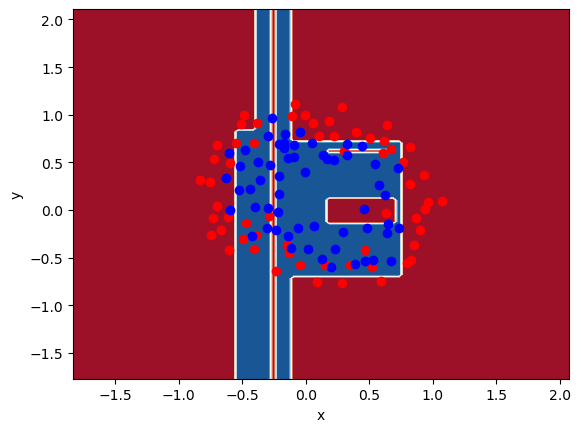

Score: 0.6666666666666666


In [5]:
draw_plot(RandomForestClassifier(n_estimators=1))

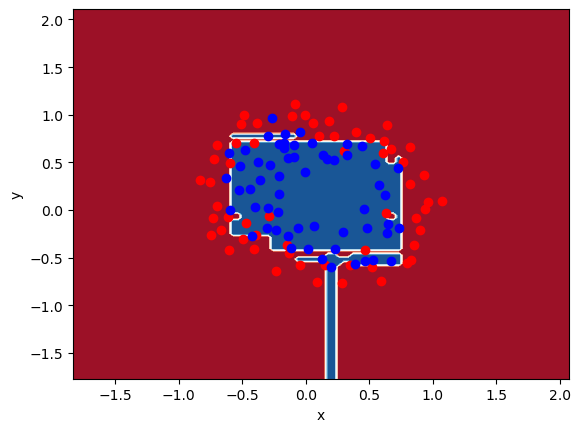

Score: 0.7083333333333334


In [6]:
draw_plot(RandomForestClassifier(n_estimators=3))

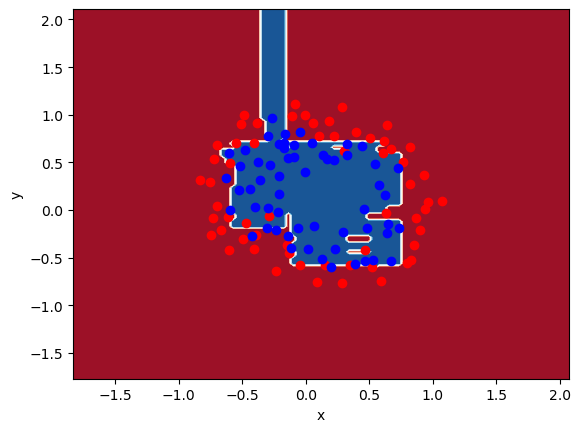

Score: 0.7083333333333334


In [7]:
draw_plot(RandomForestClassifier(n_estimators=5))

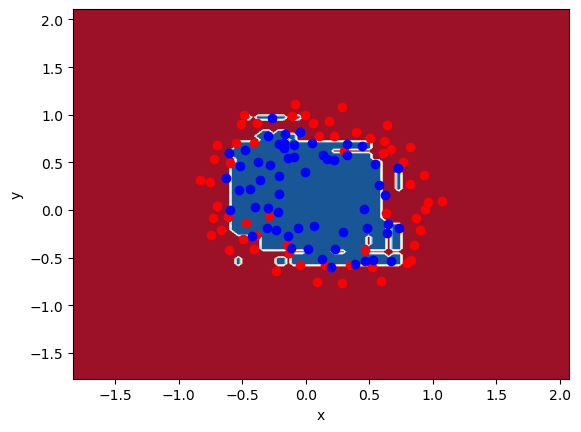

Score: 0.625


In [8]:
draw_plot(RandomForestClassifier(n_estimators=10))

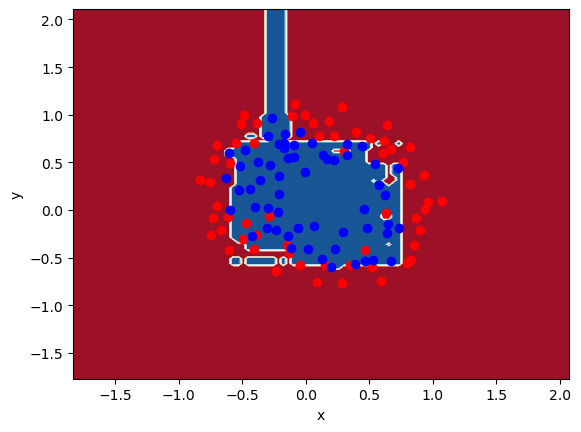

Score: 0.6666666666666666


In [9]:
draw_plot(RandomForestClassifier(n_estimators=15))

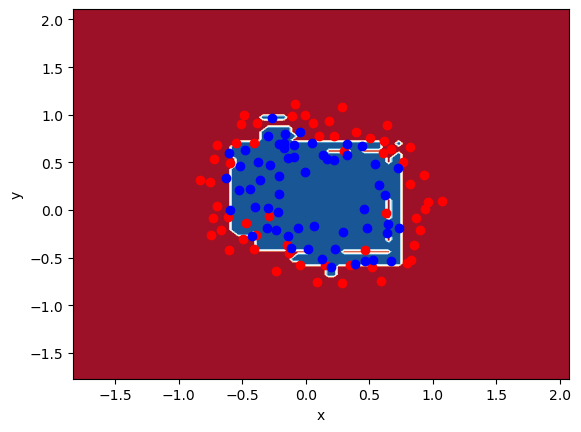

Score: 0.7083333333333334


In [10]:
draw_plot(RandomForestClassifier(n_estimators=100))

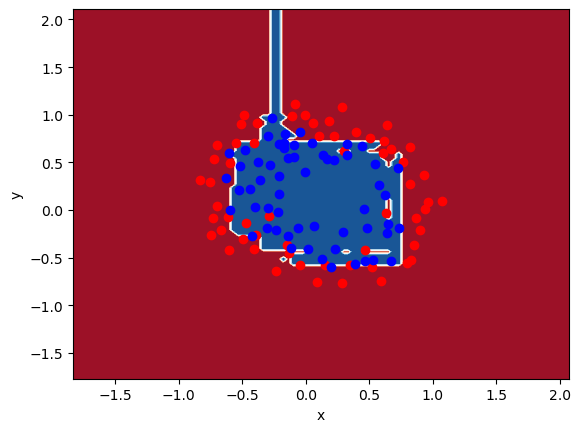

Score: 0.75


In [11]:
draw_plot(RandomForestClassifier(n_estimators=150))

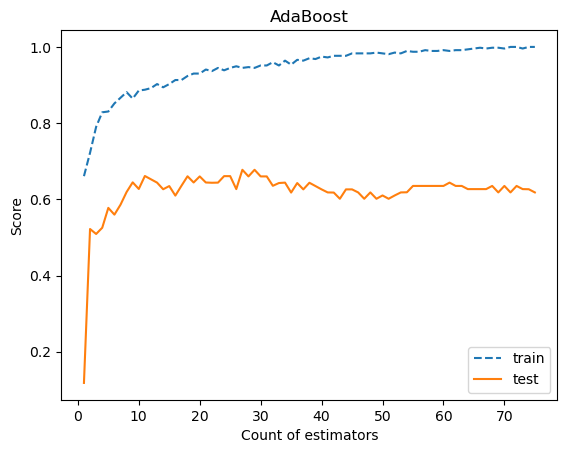

In [12]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators_list = list(range(1, 76))
scores = [test_model(AdaBoostClassifier(n_estimators=n_estimators)) for n_estimators in n_estimators_list]
train_scores = [train_score for train_score, _ in scores]
test_scores = [test_score for _, test_score in scores]
plt.plot(n_estimators_list, train_scores, label='train', linestyle='--')
plt.plot(n_estimators_list, test_scores, label='test')
plt.legend(loc='lower right')
plt.title("AdaBoost")
plt.xlabel("Count of estimators")
plt.ylabel("Score")
plt.show()

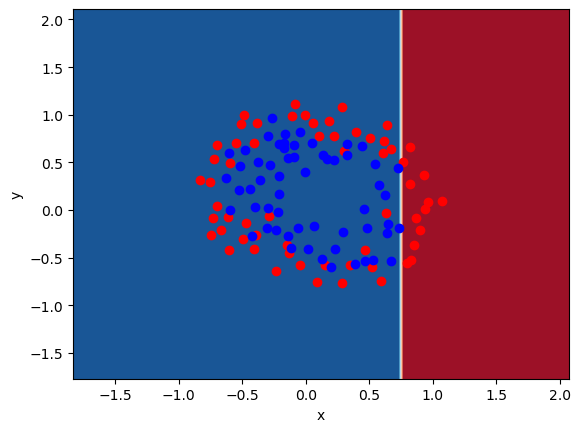

Score: 0.625


In [13]:
draw_plot(AdaBoostClassifier(n_estimators=1))

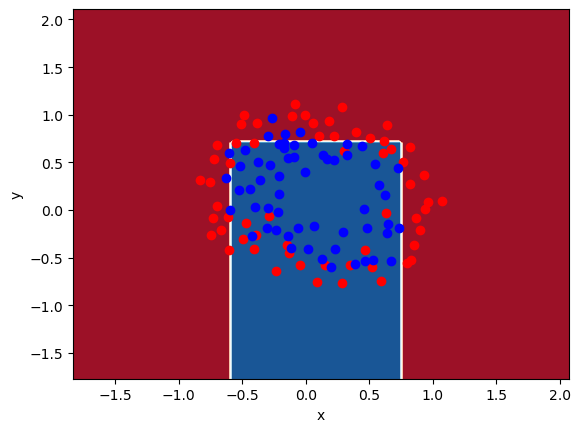

Score: 0.6666666666666666


In [14]:
draw_plot(AdaBoostClassifier(n_estimators=3))

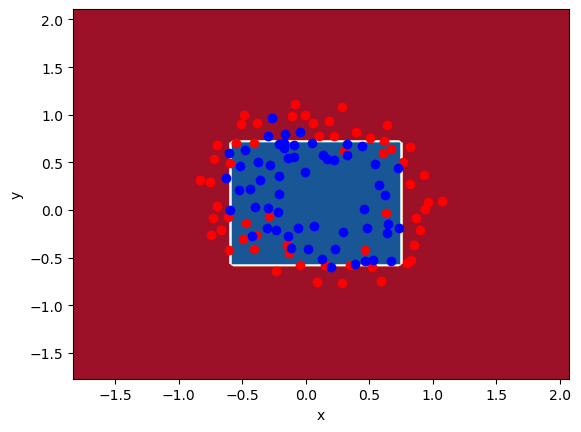

Score: 0.7083333333333334


In [15]:
draw_plot(AdaBoostClassifier(n_estimators=5))

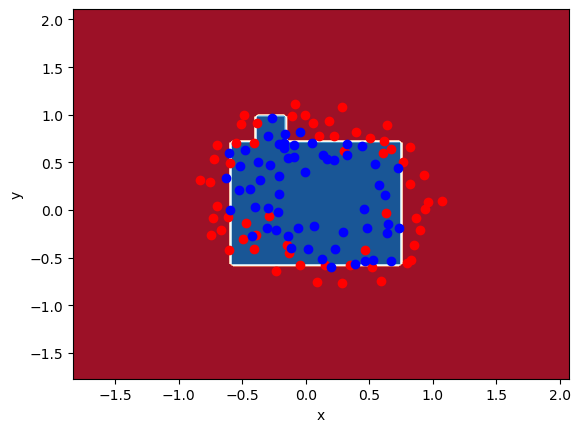

Score: 0.7083333333333334


In [16]:
draw_plot(AdaBoostClassifier(n_estimators=8))

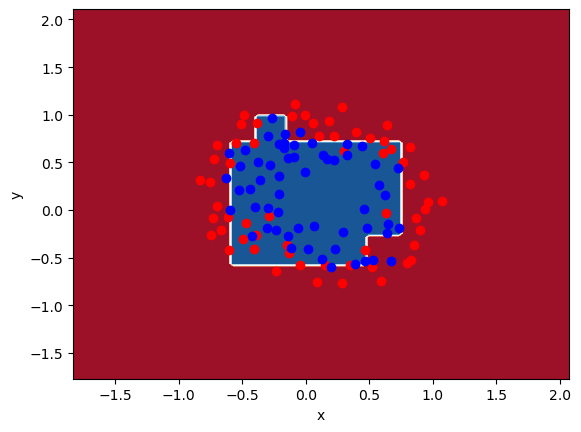

Score: 0.6666666666666666


In [17]:
draw_plot(AdaBoostClassifier(n_estimators=10))

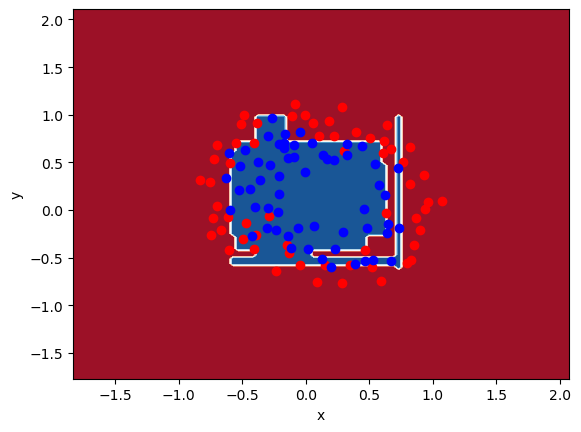

Score: 0.625


In [18]:
draw_plot(AdaBoostClassifier(n_estimators=30))

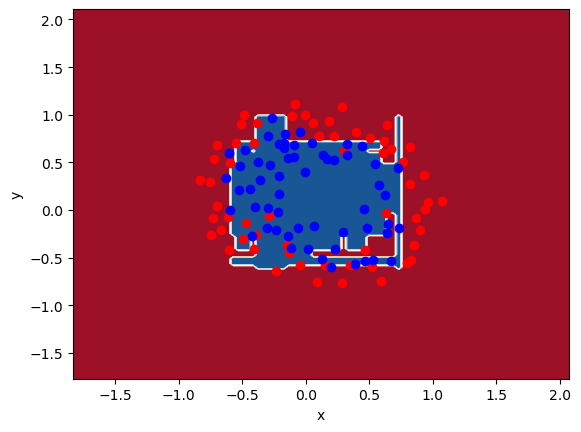

Score: 0.625


In [19]:
draw_plot(AdaBoostClassifier(n_estimators=50))

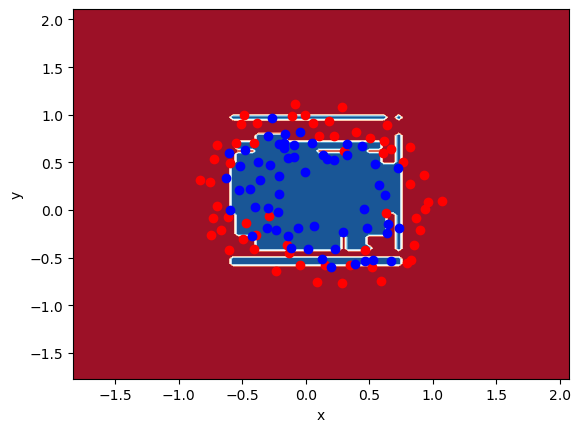

Score: 0.6666666666666666


In [20]:
draw_plot(AdaBoostClassifier(n_estimators=100))